<a href="https://colab.research.google.com/github/ammarshibani/data-analysis-colab/blob/main/Credit_Card_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Necessary Libraries
# Import libraries needed for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Step 2: Load and Inspect Dataset
# Load dataset and Display first few rows
data = pd.read_csv('Credit_Card_Fraud_Detection.csv')
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1



Missing Values in Each Column:
Unnamed: 0     0
Customer_ID    0
A_1            0
A_2            0
A_3            0
A_4            0
A_5            0
A_6            0
A_7            0
A_8            0
A_9            0
A_10           0
A_11           0
A_12           0
A_13           0
A_14           0
class          0
dtype: int64

Feature Distributions


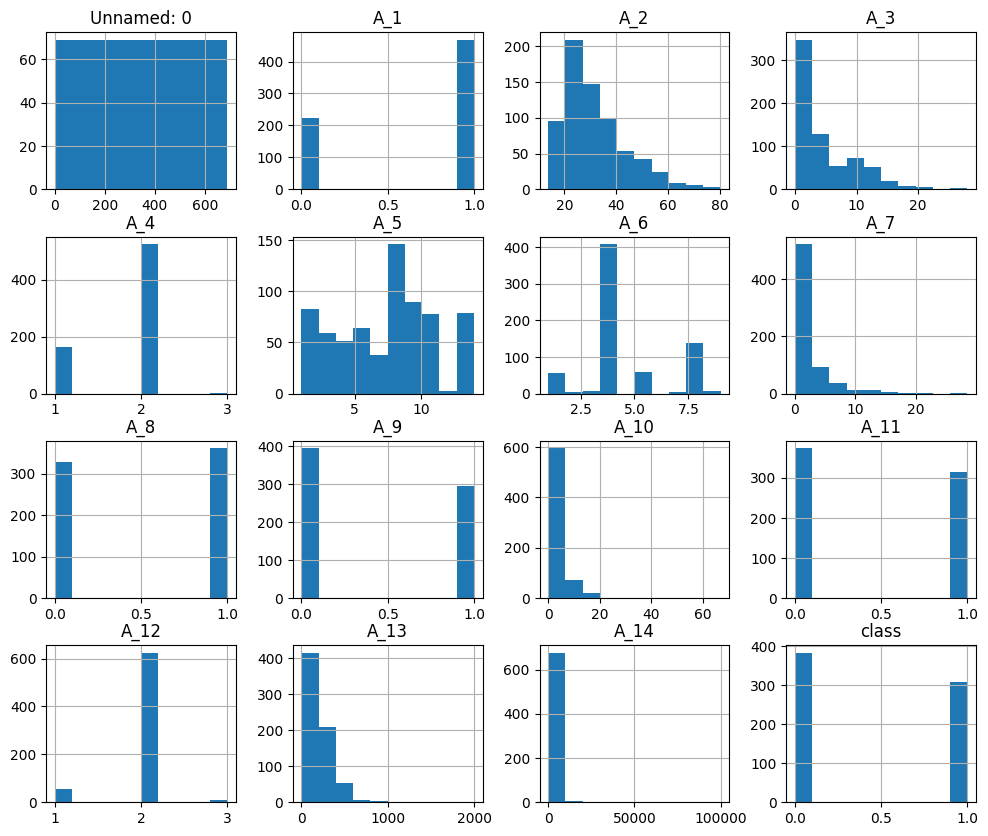

In [ ]:
# Step 3: Data Preprocessing
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())
# Drop identifier column and separate features (X) and target (y)
data.drop(columns=['Customer_ID'], inplace=True)
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable
# Visualize feature distributions (histograms)
print("\nFeature Distributions")
data.hist(figsize=(12, 10))
plt.show()

In [ ]:
# Step 4: Feature Scaling
# Scale features to ensure fair distance measurements in KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFirst 5 rows of scaled features:\n", X_scaled[:5])


First 5 rows of scaled features:
 [[-1.72954241  0.68873723 -0.80105183  1.34711063  0.54294996 -0.91628228
  -0.34796495 -0.19090583 -1.04750391 -0.86419641 -0.49388662  1.08790822
   0.23782765 -0.48835847  0.03738039]
 [-1.72452196 -1.45193254 -0.75124044  0.45054795  0.54294996  0.17049859
  -0.34796495 -0.61553587 -1.04750391 -0.86419641 -0.49388662 -0.91919518
   0.23782765 -0.13959116 -0.19541334]
 [-1.71950152 -1.45193254 -0.16785619 -0.60482292 -1.78397845 -0.91628228
  -0.34796495 -0.29108264 -1.04750391 -0.86419641 -0.49388662  1.08790822
   0.23782765  0.55794344 -0.19541334]
 [-1.71448108 -1.45193254 -0.83566653  1.35515155 -1.78397845 -0.64458706
  -0.85025746 -0.66487669  0.95465038  1.15714435  1.76976039  1.08790822
   0.23782765 -1.06963731 -0.19541334]
 [-1.70946064  0.68873723 -0.96230566  0.68574489  0.54294996 -0.37289184
  -0.34796495 -0.07876762  0.95465038  1.15714435  2.38711867 -0.91919518
   0.23782765 -0.72087    -0.16506564]]


In [ ]:
# Step 5: Train-Test Split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}, \nTest set size: {X_test.shape}")


Training set size: (552, 15), 
Test set size: (138, 15)


In [ ]:
# Step 6: Optimal k Selection
# Use GridSearchCV to find the best k value for KNN
param_grid = {'n_neighbors': np.arange(1, 16)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"\nOptimal k value found through Grid Search: {best_k}")


Optimal k value found through Grid Search: 11



Model Accuracy: 89.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.93      0.76      0.84        51

    accuracy                           0.89       138
   macro avg       0.90      0.87      0.88       138
weighted avg       0.89      0.89      0.89       138



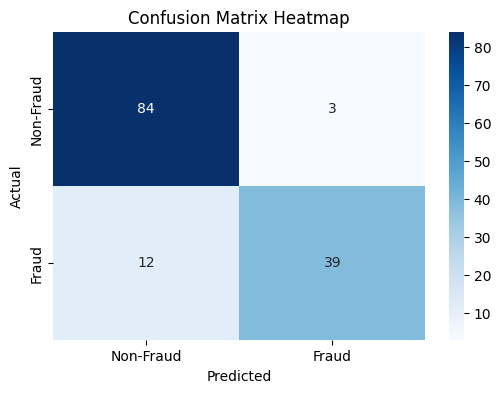

In [ ]:
# Step 7: Model Training , Model Evaluation and Prediction
# Train KNN model with the best k and predict on the test set
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

# Display accuracy and detailed classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

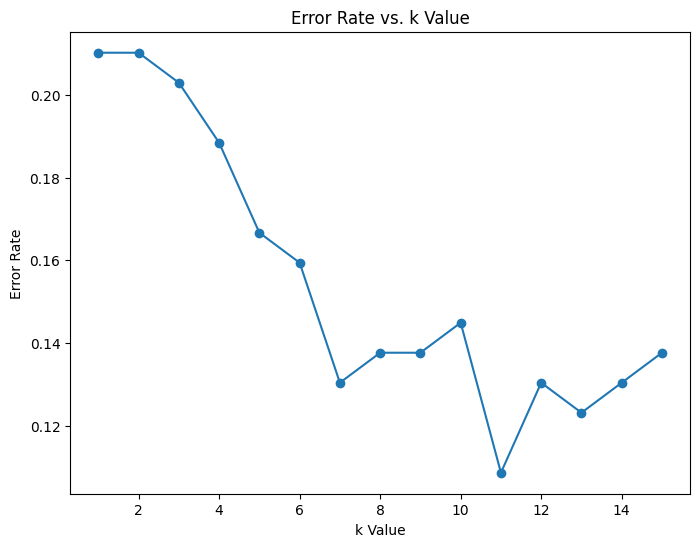

In [ ]:
# Step 8: Error Rate Visualization
# Plot error rates for different k values to observe optimal choice
error_rate = []
for k in range(1, 16):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    pred_temp = knn_temp.predict(X_test)
    error_rate.append(np.mean(pred_temp != y_test))

plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), error_rate, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.show()